
Life cycle of ML Project: 
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv(r"D:\MLProjects\notebook\data\StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

In [8]:
# Checking null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# check duplicated value
df.duplicated().sum()

0

In [10]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking unique values

In [11]:
df['gender'].unique()


array(['female', 'male'], dtype=object)

In [12]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [15]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
# check statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


breaking feature into categorical and numerical features

In [17]:
numeric_features=[num_f for num_f in df.columns if df[num_f].dtype!='O']
categorical_feature=[f_cat for f_cat in df.columns if df[f_cat].dtype=='O']

In [18]:
numeric_features

['math score', 'reading score', 'writing score']

In [19]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df['total_score']=df['math score']+df['writing score']+df['reading score']
df['average_score']=df['total_score']/3

In [22]:
df['average_score']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full=df[df['writing score']==100]['average_score'].count()
Math_full=df[df['math score']==100]['average_score'].count()

In [25]:
print(reading_full)
print(writing_full)
print(Math_full)

17
14
7


In [26]:
reading_less20 = df[df['reading score'] <=20]['average_score'].count()
writing_less20=df[df['writing score']<=20]['average_score'].count()
Math_less20=df[df['math score']<=20]['average_score'].count()

In [27]:
print(reading_less20)
print(writing_less20)
print(Math_less20)

1
3
4


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='average_score', ylabel='Count'>

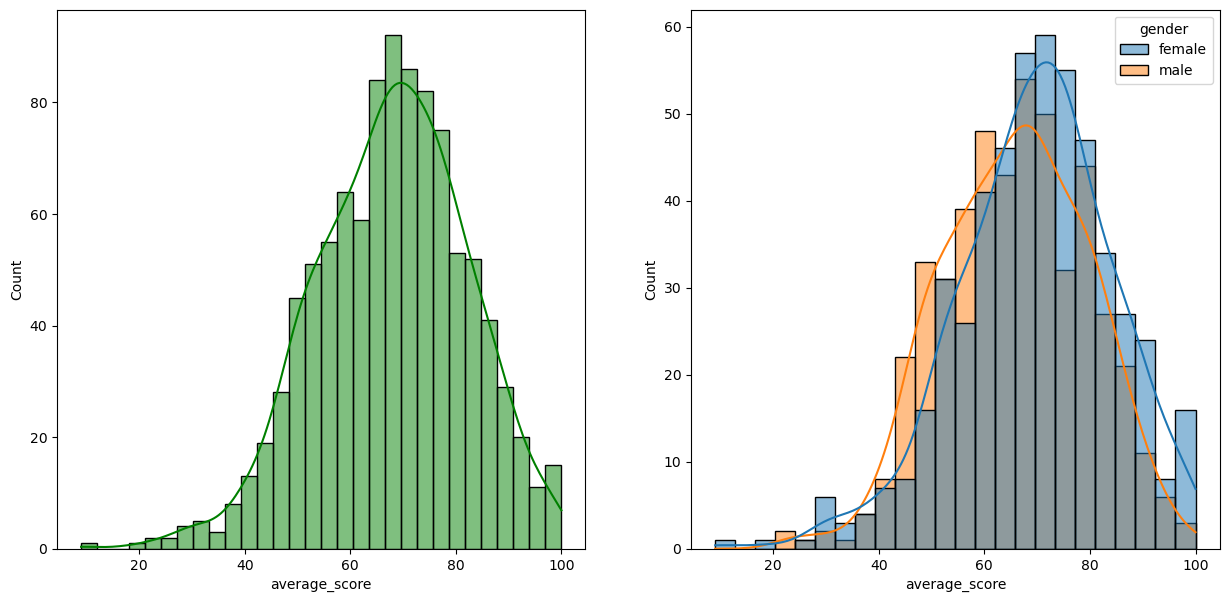

In [34]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score', kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

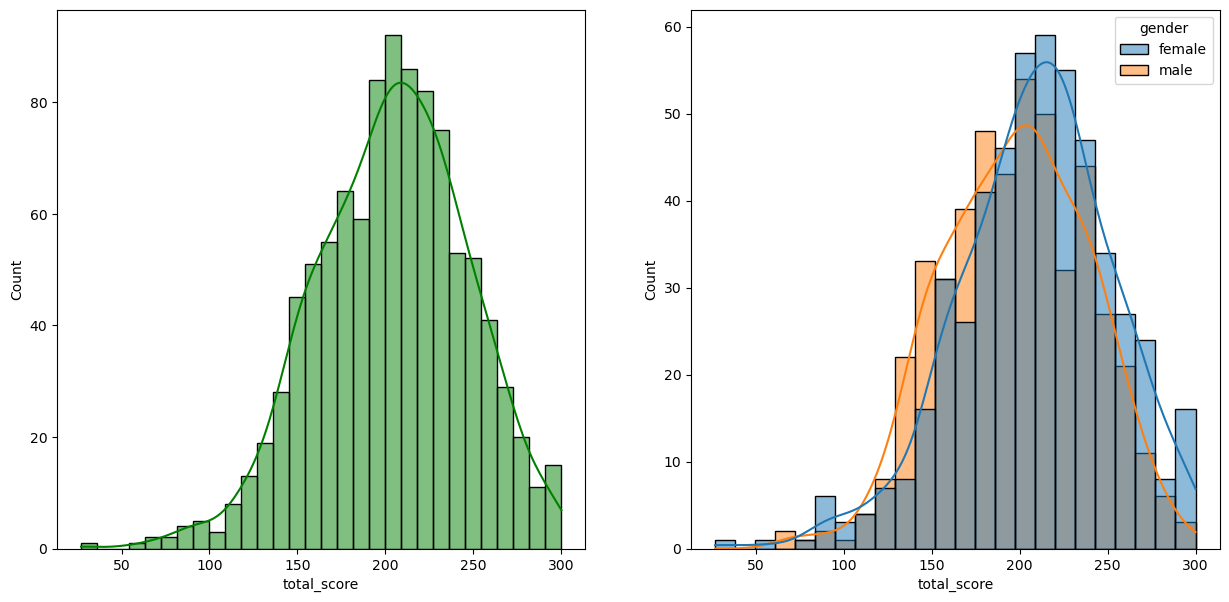

In [35]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score', kde=True,hue='gender')

Female students tend to perform well than male students